In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('MSFT.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [5]:
df.isnull().values.any()

False

In [6]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8857 non-null   datetime64[ns]
 1   Open       8857 non-null   float64       
 2   High       8857 non-null   float64       
 3   Low        8857 non-null   float64       
 4   Close      8857 non-null   float64       
 5   Adj Close  8857 non-null   float64       
 6   Volume     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

(array([724276., 725737., 727198., 728659., 730120., 731581., 733042.,
        734503., 735964., 737425., 738886.]),
 <a list of 11 Text xticklabel objects>)

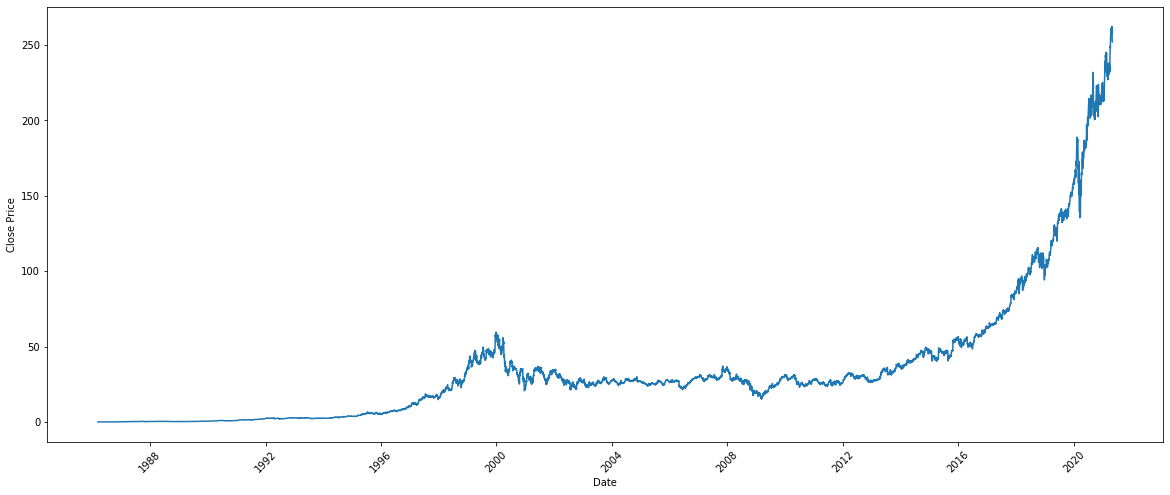

In [12]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [13]:
df['Daily Lag'] = df['Close'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,0.097222
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,0.100694
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,0.102431
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,0.099826


In [14]:
df['Daily Returns'] = (df['Daily Lag']/df['Close']) -1
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,0.097222,-0.034481
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,0.100694,-0.016958
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,0.102431,0.026095
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,0.099826,0.017698


(array([724276., 725737., 727198., 728659., 730120., 731581., 733042.,
        734503., 735964., 737425., 738886.]),
 <a list of 11 Text xticklabel objects>)

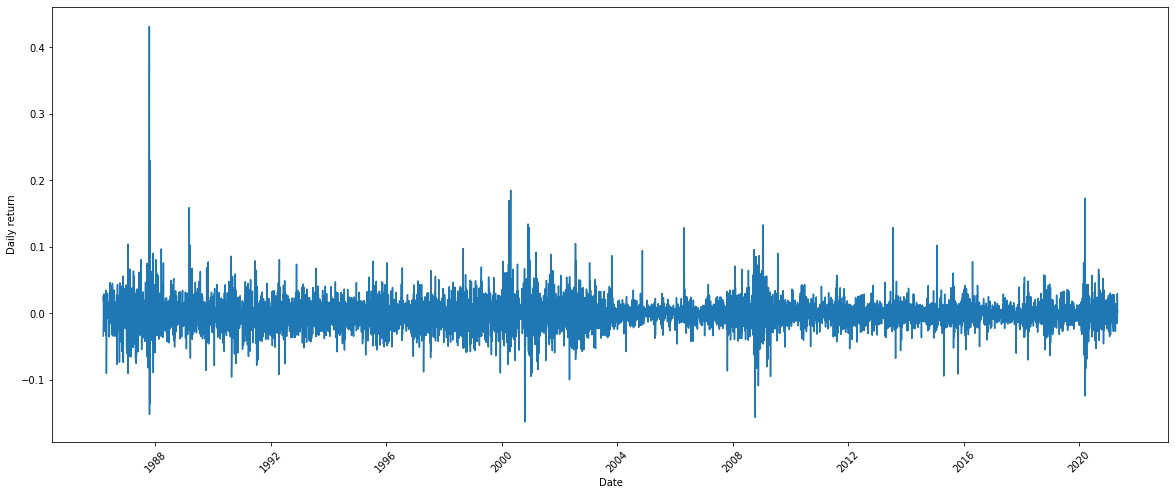

In [15]:
plt.figure(figsize=(20,8))
plt.plot('Date','Daily Returns',data=df)
plt.xlabel('Date')
plt.ylabel('Daily return')
plt.xticks(rotation=45)

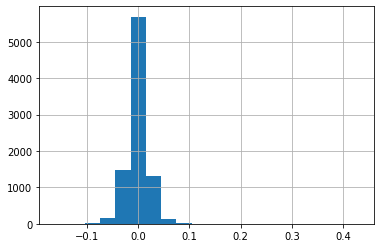

In [16]:
df['Daily Returns'].hist(bins=20)

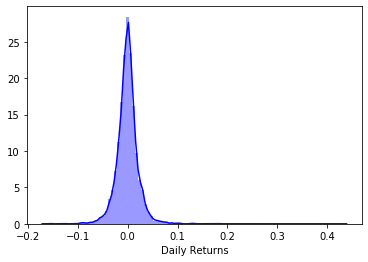

In [30]:
sns.distplot(df['Daily Returns'].dropna(),bins=100,color='blue')
plt.show()

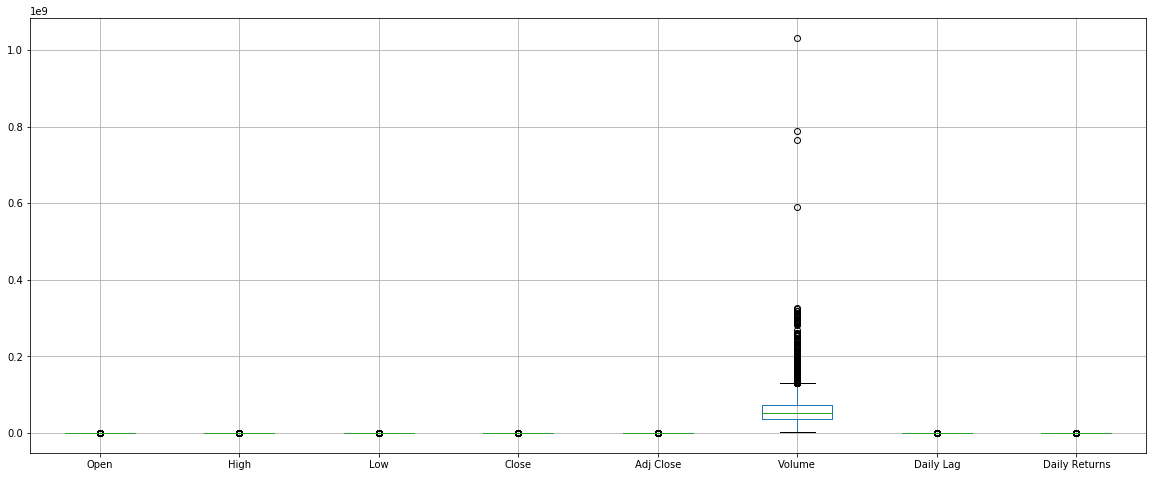

In [19]:
plt.figure(figsize=(20,8))
df.boxplot()

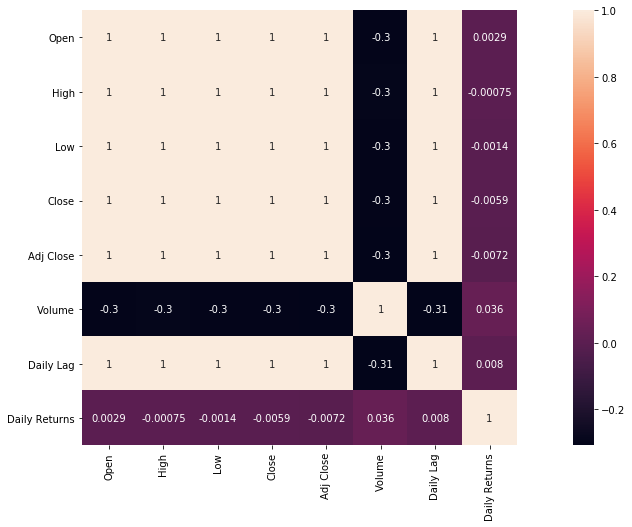

In [21]:
plt.figure(figsize=(20,8))
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

<Figure size 1440x576 with 0 Axes>

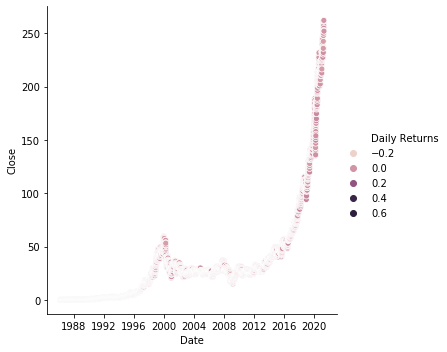

In [24]:
plt.figure(figsize=(20,8))
sns.relplot(x='Date', y='Close', hue='Daily Returns', data=df)

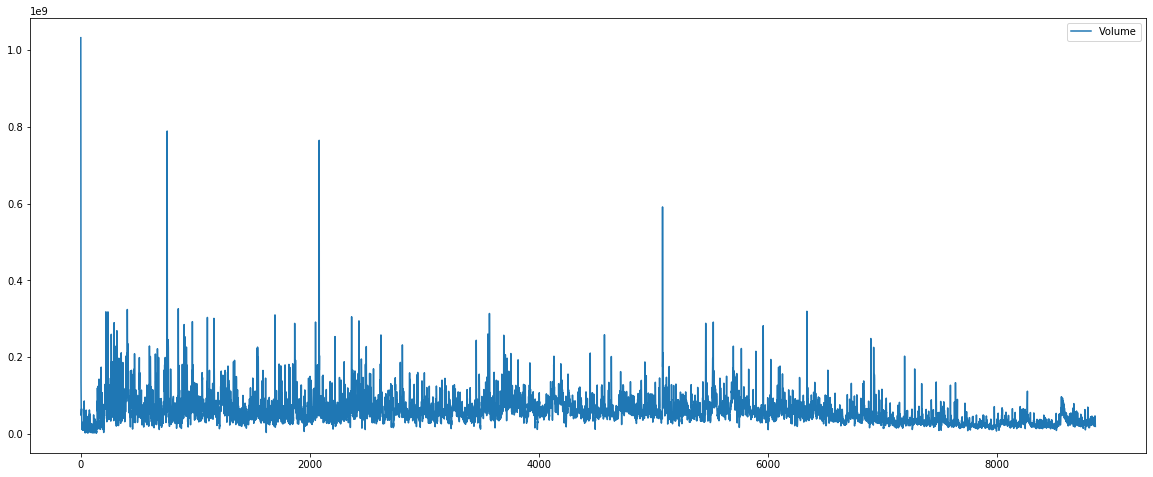

In [27]:
df['Volume'].plot(legend=True,figsize=(20,8))
plt.show()

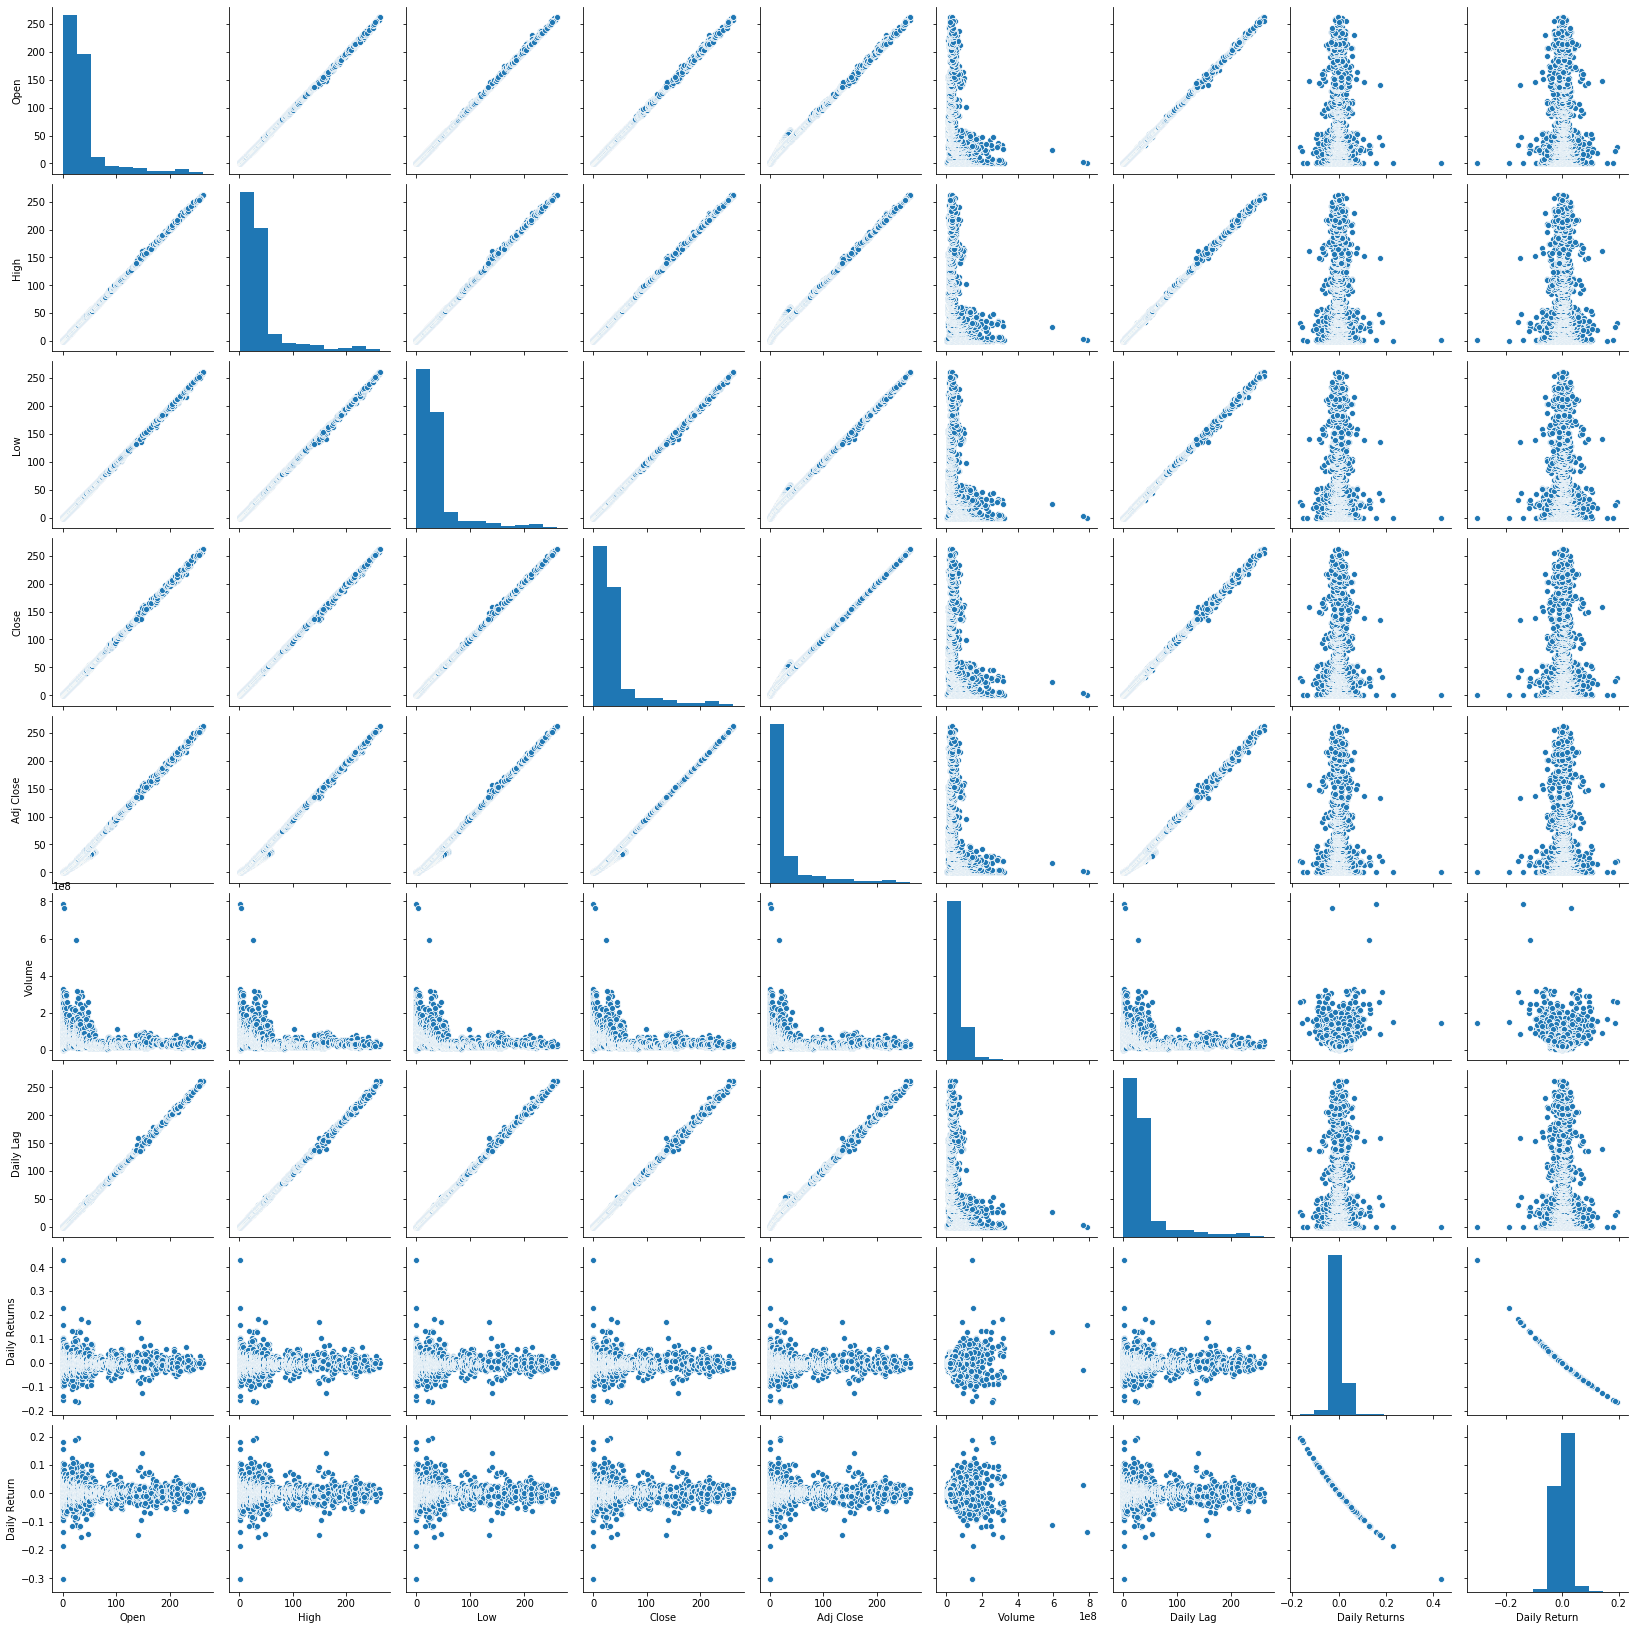

In [31]:
sns.pairplot(df.dropna())
plt.show()